In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(2024)

def generate_data(n, p, true_beta):
    X = np.random.normal(loc=0, scale=1, size=(n, p))
    true_beta = np.reshape(true_beta, (p, 1))
    noise = np.random.normal(loc=0, scale=1, size=(n, 1))

    y = np.dot(X, true_beta) + noise

    return X, y

def run():
    n = 100
    p = 1
    true_beta = [0.0]
    X, y = generate_data(n, p, true_beta)

    # # X_bias = np.c_[np.ones((n,1)), X]

    # # Your code here to compute p-value
    # # beta_hat = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    # beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    # T = beta_hat[0][0]
    # T = np.abs(T)
    # p_value = 2 * min((1 - norm.cdf(T)), norm.cdf(T))
    # # p_value = 2 * (1 - norm.cdf(np.abs(T), loc=0, scale=1))

    # return p_value, T

    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

    # Tính phần dư (residuals)
    residuals = y - X @ beta_hat
    sigma_hat_sq = (residuals.T @ residuals) / (n - p)  # Phương sai nhiễu ước lượng

    # Tính phương sai của beta_hat
    # sigma_hat_sq = 1
    var_beta_hat = sigma_hat_sq * np.linalg.inv(X.T @ X)  # Ma trận phương sai hiệp phương sai
    std_beta_hat = np.sqrt(var_beta_hat[0, 0])  # Sai số chuẩn của beta_hat

    print(f"std_beta_hat: {std_beta_hat}")  

    # Giá trị t-statistic
    T = beta_hat[0, 0] / std_beta_hat

    print(f"T = {T}\n")

    # Tính p-value dựa trên phân phối t-Student
    p_value = 2 * (1 - norm.cdf(np.abs(T)))

    return p_value, T

In [3]:

if __name__ == '__main__':
    p_value, T= run()
    print(f'p-value: {p_value}')

    alpha = 0.05
    if p_value < alpha:
        print('Reject H0')
    else:
        print('Accept H0')

std_beta_hat: 0.10185946455925997
T = 2.259684906279158

p-value: 0.023840813735402255
Reject H0


std_beta_hat: 0.10118895191093502
T = 0.07654791024113135

std_beta_hat: 0.08727198392554128
T = -0.9507987963811056

std_beta_hat: 0.10289198055555855
T = -0.8802690299353694

std_beta_hat: 0.10786903237086062
T = -0.9861111015105158

std_beta_hat: 0.10164881661096016
T = -0.7625183208993425

std_beta_hat: 0.09423218529076127
T = -0.35557066007569665

std_beta_hat: 0.09724463401674482
T = -1.6324039061455233

std_beta_hat: 0.08645716434221558
T = -0.46819863481787904

std_beta_hat: 0.09787837260545158
T = 1.4123441189554244

std_beta_hat: 0.10151563127850537
T = 1.1560481102284754

std_beta_hat: 0.0986714701074775
T = 0.20673606943028514

std_beta_hat: 0.1017213054570158
T = 0.368881982695743

std_beta_hat: 0.09542664979436269
T = 0.07213830307147395

std_beta_hat: 0.09111936438295846
T = 1.4394437986390962

std_beta_hat: 0.08820376672908575
T = -0.17790720828105308

std_beta_hat: 0.09374164028276365
T = -0.9214914988627225

std_beta_hat: 0.09410702874613831
T = -0.1060921237481153

s

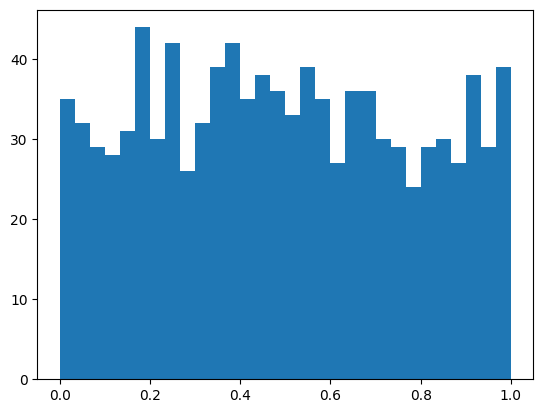

In [4]:
max_iter = 1000

alpha = 0.05
T_values = []
p_values = []
for i in range(max_iter):
    p_value, T = run()
    T_values.append(T)
    p_values.append(p_value)

plt.hist(p_values, bins=30)
# plt.axvline(x=np.percentile(T_values, alpha/2*100), color='r', linestyle='--')
# plt.axvline(x=np.percentile(T_values, (1-alpha/2)*100), color='r', linestyle='--')
plt.show()

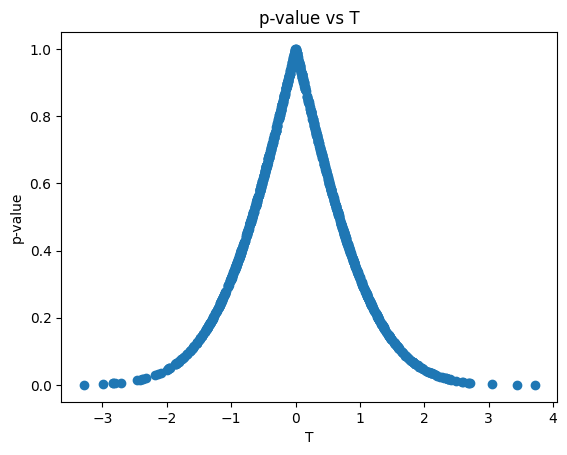

In [5]:
plt.scatter(T_values, p_values)
plt.title('p-value vs T')
plt.xlabel('T')
plt.ylabel('p-value')
plt.show()

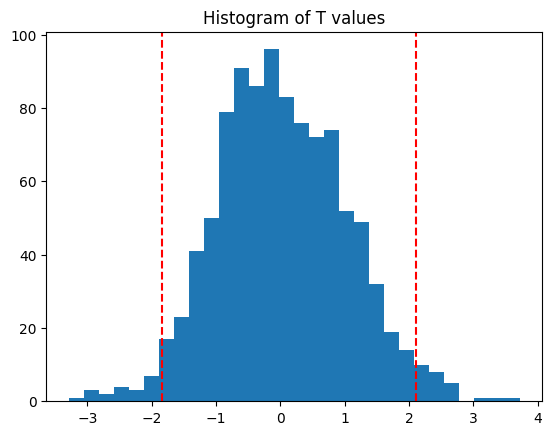

In [6]:
plt.hist(T_values, bins=30)
plt.title('Histogram of T values')
plt.axvline(x=np.percentile(T_values, alpha/2*100), color='r', linestyle='--')
plt.axvline(x=np.percentile(T_values, (1-alpha/2)*100), color='r', linestyle='--')
plt.show()